In [1]:
!pip install gdown

# **Import and Download Datasets**

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1m1pCvnzBi-2Bd68fwo5P-RWN5Z8WBrdJ'
output = 'data.zip'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1m1pCvnzBi-2Bd68fwo5P-RWN5Z8WBrdJ
From (redirected): https://drive.google.com/uc?id=1m1pCvnzBi-2Bd68fwo5P-RWN5Z8WBrdJ&confirm=t&uuid=d5e41653-4092-484d-92e7-a238826dd23e
To: /content/data.zip
100%|██████████| 438M/438M [00:17<00:00, 25.2MB/s]


'data.zip'

In [3]:
import os
import zipfile

import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

# **Extract Dataset**

In [4]:
# Extract the Dataset
# Ekstrak dataset
local_zip = '/content/data.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/content/file')

data_path = '/content/file/data'
# Periksa direktori yang diekstrak
print(os.listdir(data_path))

['suillus', 'pleurotus_ostreatus', 'boletus_edulis', 'flammulina_velutipes', 'amanita', 'phellinus_igniarius', 'laetiporus_sulphureus', 'boletus_reticulatus', 'hericium_coralloides', 'lactarius_deliciosus']


# **Making directory for Train, Test, and Validation data**

In [5]:
os.mkdir('/content/data/')
os.mkdir('/content/data/train')
os.mkdir('/content/data/valid')
os.mkdir('/content/data/test')

# Split image (70/15/15 %)
for subfolder in os.listdir(data_path):

  # Making a list of all files in current subfolder
  original_path = f'{data_path}/{subfolder}'
  original_data = os.listdir(original_path)

  # Number of samples in each group
  n_samples = len(original_data)
  train_samples = int(n_samples * 0.7)
  valid_samples = int(n_samples * 0.85)

  train_path = f'/content/data/train/{subfolder}'
  valid_path = f'/content/data/valid/{subfolder}'
  test_path = f'/content/data/test/{subfolder}'

  # New class subfolder for training
  os.chdir('/content/data/train')
  os.mkdir(subfolder)

  # Training images
  for image in range(train_samples):
    original_file = f'{original_path}/{original_data[image]}'
    new_file = f'{train_path}/{original_data[image]}'
    shutil.copyfile(original_file, new_file)

  # New class subfolder for validation
  os.chdir('/content/data/valid')
  os.mkdir(subfolder)

  # Validation images
  for image in range(train_samples, valid_samples):
    original_file = f'{original_path}/{original_data[image]}'
    new_file = f'{valid_path}/{original_data[image]}'
    shutil.copyfile(original_file, new_file)

  # New class subfolder for testing
  os.chdir('/content/data/test')
  os.mkdir(subfolder)

  # Test images
  for image in range(valid_samples, n_samples):
    original_file = f'{original_path}/{original_data[image]}'
    new_file = f'{test_path}/{original_data[image]}'
    shutil.copyfile(original_file, new_file)


In [6]:
# Settings for displaying charts
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams.update({'font.size': 12})


# **Displaying examples from each class**

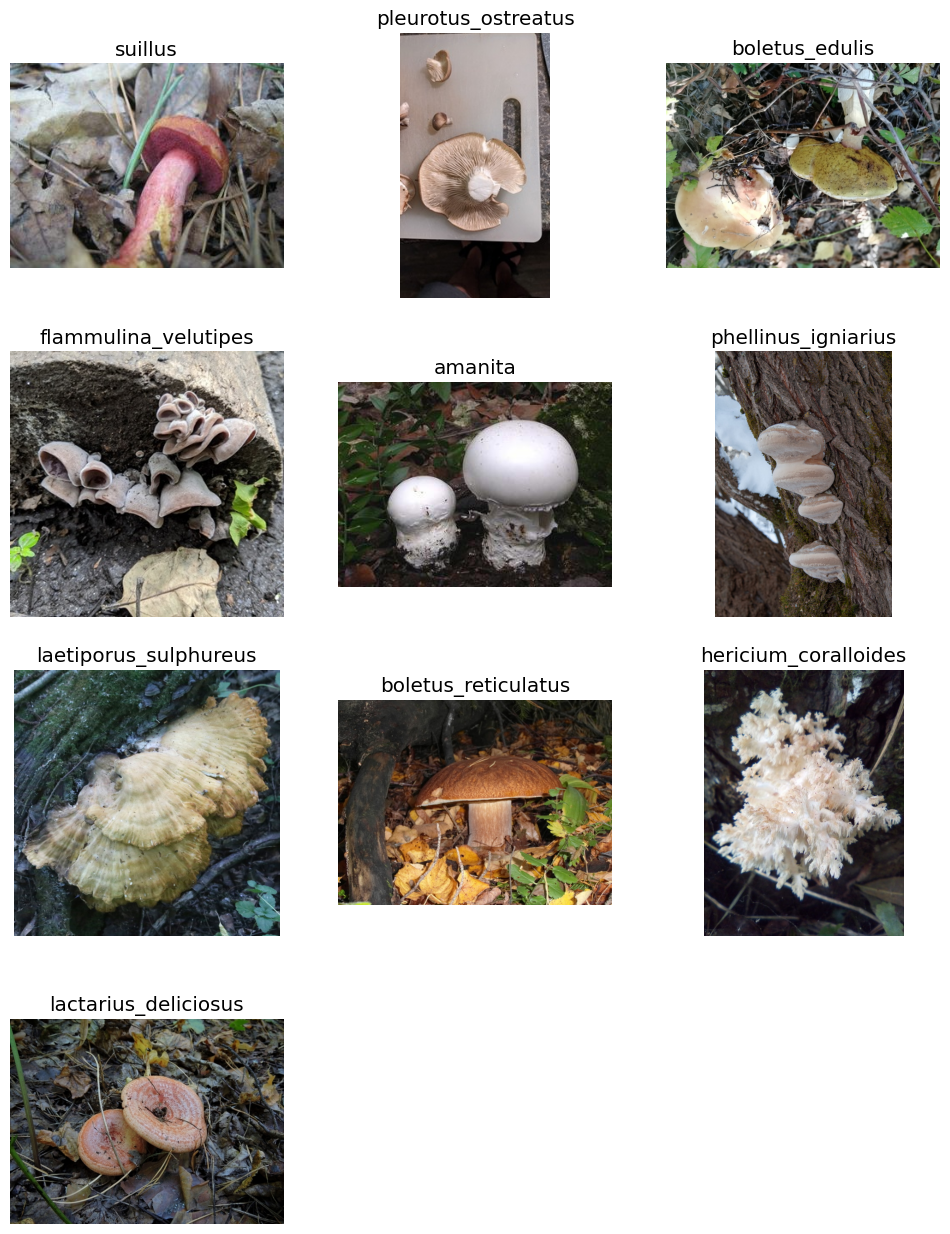

In [7]:
# Displaying examples from each class
nrows = 5
ncols = 3

pos = 0

for subfolder in os.listdir(data_path):

    image_file = os.listdir(os.path.join(data_path, subfolder))[0]

    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)

    pos += 1
    sp = plt.subplot(nrows, ncols, pos)

    cur_image = mpimg.imread(os.path.join(data_path, subfolder, image_file))
    plt.imshow(cur_image)
    plt.title(subfolder)
    plt.axis('Off')

In [8]:
IMG_SIZE = 255
BATCH_SIZE = 64

In [9]:
# Direktori untuk data pelatihan dan pengujian
TRAINING_DIR = '/content/data/train'
VALIDATION_DIR = '/content/data/valid'
TEST_DIR = '/content/data/test'

# Create image datasets
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input)\
                    .flow_from_directory(directory=TRAINING_DIR,
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)
valid_generator = ImageDataGenerator(preprocessing_function=preprocess_input)\
                    .flow_from_directory(directory=VALIDATION_DIR,
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)\
                    .flow_from_directory(directory=TEST_DIR,
                                         target_size=(IMG_SIZE, IMG_SIZE),
                                         class_mode='categorical',
                                         batch_size=BATCH_SIZE,
                                         shuffle=False)

Found 3403 images belonging to 10 classes.
Found 728 images belonging to 10 classes.
Found 735 images belonging to 10 classes.


In [10]:
num_train_samples = len(train_generator) * train_generator.batch_size
num_validation_samples = len(valid_generator) * valid_generator.batch_size

In [11]:
print(train_generator.class_indices)

label_txt = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('/content/label.txt', 'w') as f:
  f.write(label_txt)


{'amanita': 0, 'boletus_edulis': 1, 'boletus_reticulatus': 2, 'flammulina_velutipes': 3, 'hericium_coralloides': 4, 'lactarius_deliciosus': 5, 'laetiporus_sulphureus': 6, 'phellinus_igniarius': 7, 'pleurotus_ostreatus': 8, 'suillus': 9}


# **Using MobileNetV3Large Model**

In [12]:
feature_model = tf.keras.applications.MobileNetV3Large(weights="imagenet",
                                                       include_top=False,
                                                       input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                                       pooling='avg')

feature_model.summary()

12683000/12683000 [==============================] - 1s 0us/step
Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 255, 255, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 255, 255, 3)          0         ['input_1[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 128, 128, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 128, 128, 16)         64        ['Conv[0][0]']                
 lization)        

# **Adding layers to the pre-trained model**

In [13]:
# Construct a new model with the final dense layer for 14 classes
new_model = tf.keras.models.Sequential([
        feature_model,
        tf.keras.layers.Dense(10, activation='softmax')
    ])

# Make all the layers from the original ResNet model untrainable
new_model.layers[0].trainable = False

In [14]:
# Metrics and optimizer
new_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Check the architecture of the new model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 960)               2996352   
 al)                                                             
                                                                 
 dense (Dense)               (None, 10)                9610      
                                                                 
Total params: 3005962 (11.47 MB)
Trainable params: 9610 (37.54 KB)
Non-trainable params: 2996352 (11.43 MB)
_________________________________________________________________


In [15]:
# Callbacks to be exercised during training
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                              patience=10,
                                              restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor=0.1,
                                                 mode='max',
                                                 cooldown=2,
                                                 patience=2,
                                                 min_lr=0)

# **Train the Model**

In [16]:
# Train new model:
history = new_model.fit(train_generator,
                        validation_data=valid_generator,
                        epochs=40,
                        steps_per_epoch = num_train_samples // BATCH_SIZE,
                        validation_steps = num_validation_samples // BATCH_SIZE,
                        verbose=2,
                        callbacks=[reduce_lr, early_stop],
                        use_multiprocessing=True,
                        workers=2)

Epoch 1/40


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


54/54 - 51s - loss: 1.3117 - accuracy: 0.6074 - val_loss: 0.7061 - val_accuracy: 0.8063 - lr: 0.0010 - 51s/epoch - 947ms/step
Epoch 2/40
54/54 - 49s - loss: 0.5332 - accuracy: 0.8540 - val_loss: 0.4843 - val_accuracy: 0.8571 - lr: 0.0010 - 49s/epoch - 912ms/step
Epoch 3/40
54/54 - 42s - loss: 0.3790 - accuracy: 0.8930 - val_loss: 0.4030 - val_accuracy: 0.8819 - lr: 0.0010 - 42s/epoch - 773ms/step
Epoch 4/40
54/54 - 36s - loss: 0.3076 - accuracy: 0.9127 - val_loss: 0.3513 - val_accuracy: 0.8915 - lr: 0.0010 - 36s/epoch - 665ms/step
Epoch 5/40
54/54 - 41s - loss: 0.2581 - accuracy: 0.9277 - val_loss: 0.3249 - val_accuracy: 0.9011 - lr: 0.0010 - 41s/epoch - 757ms/step
Epoch 6/40
54/54 - 41s - loss: 0.2262 - accuracy: 0.9371 - val_loss: 0.3072 - val_accuracy: 0.9093 - lr: 0.0010 - 41s/epoch - 758ms/step
Epoch 7/40
54/54 - 40s - loss: 0.1999 - accuracy: 0.9448 - val_loss: 0.3011 - val_accuracy: 0.9080 - lr: 0.0010 - 40s/epoch - 741ms/step
Epoch 8/40
54/54 - 40s - loss: 0.1802 - accuracy: 0.

# **Plot the Model Accuracy and Loss**

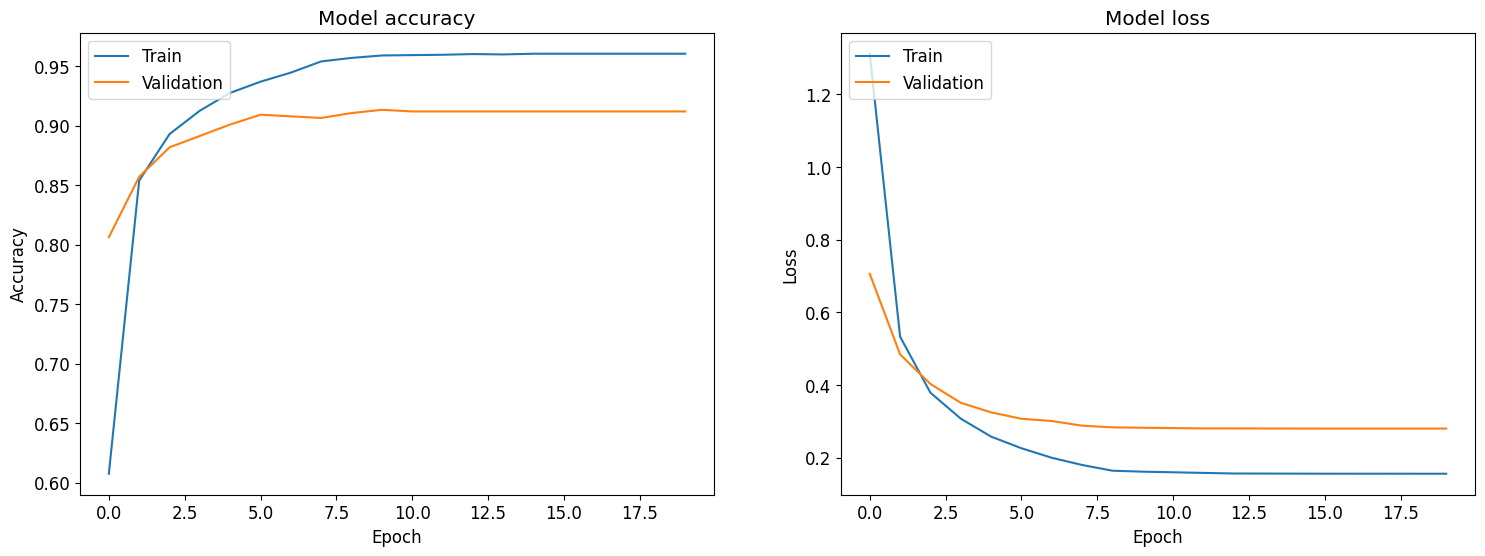

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
# Get the number of trainable variables
num_trainable_variables = len(new_model.trainable_variables)

print('Number of trainable variables = {}'.format(num_trainable_variables))

Number of trainable variables = 2


In [19]:
print(train_generator)

# **Save Model**

In [20]:
new_model.save('model.tflite')

tf.saved_model.save(new_model,'model.pb')


## **Convert Model to TFLITE**

In [21]:
# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model
with tf.io.gfile.GFile('model2.tflite', 'wb') as f:
    f.write(tflite_model)


In [22]:
from google.colab import files

files.download('model2.tflite')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model Evaluation**

In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Load the trained model
from tensorflow.keras.models import load_model

model = load_model('model.tflite')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Get the predictions for the test dataset
predictions = model.predict(test_generator)

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test dataset generator
true_labels = test_generator.classes

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

print('Confusion Matrix:')
print(confusion_mat)

12/12 [==============================] - 6s 422ms/step - loss: 0.2685 - accuracy: 0.9156
Test Loss: 0.2685108780860901
Test Accuracy: 0.9156462550163269
12/12 [==============================] - 4s 249ms/step
Confusion Matrix:
[[106   1   0   0   0   0   0   0   1   5]
 [  0 197   2   0   1   3   0   0   0   0]
 [  0  22  16   0   0   0   0   0   0   0]
 [  0   1   0  64   1   0   0   1   2   0]
 [  0   0   0   0  92   0   1   1   0   0]
 [  0   4   0   1   0  36   0   0   0   1]
 [  0   0   0   0   1   0  35   0   1   0]
 [  0   1   1   0   0   0   1  48   0   0]
 [  0   1   0   3   0   0   0   0  37   0]
 [  2   1   0   0   0   1   0   0   1  42]]
